In [7]:
import csv
import numpy as np
import math as mp
import cmath as cm
from scipy.optimize import fsolve, root, fmin

import matplotlib as mpl
import matplotlib.pyplot as plt

def bestSaveFig(name):
    plt.savefig(name, bbox_inches = 'tight', pad_inches = 0.1, dpi = 500)
    
def dataGet(stFN):
    boi = csv.reader(open(stFN, "r"), delimiter=',')
    
    dep = []
    real = []
    imag = []
    mag = []
    for row in boi:
        dep.append(float(row[0]))
        real.append(float(row[1]))
        imag.append(float(row[2]))
        mag.append(float(row[3]))
        
    return([dep, real, imag, mag])

def sweepConsol_nstFSv01(sweep1, sweep2, sweep3):
    freq = []
    realSig = []
    imagSig = []
    
    fn_freq1 = "FrequencySweep_"+str(sweep1)+".csv"
    fn_freq2 = "FrequencySweep_"+str(sweep2)+".csv"
    fn_freq3 = "FrequencySweep_"+str(sweep3)+".csv"
    
    data_freq1 = dataGet(fn_freq1)
    data_freq2 = dataGet(fn_freq2)
    data_freq3 = dataGet(fn_freq3)
    
    freq = np.concatenate((freq, data_freq1[0]))
    freq = np.concatenate((freq, data_freq2[0]))
    freq = np.concatenate((freq, data_freq3[0]))
    
    realSig = np.concatenate((realSig, data_freq1[1]))
    realSig = np.concatenate((realSig, data_freq2[1]))
    realSig = np.concatenate((realSig, data_freq3[1]))
    
    imagSig = np.concatenate((imagSig, data_freq1[2]))
    imagSig = np.concatenate((imagSig, data_freq2[2]))
    imagSig = np.concatenate((imagSig, data_freq3[2]))
    
    return(freq, realSig, imagSig)

def sweepSig_nstFSv01(sweepSet):
    freq, realSig, imagSig = nstFSv01(sweepSet[0], sweepSet[1], sweepSet[2])
    magSig = np.sqrt(np.add(np.square(realSig), np.square(imagSig)))
    
    return(freq, realSig, imagSig, magSig)
    

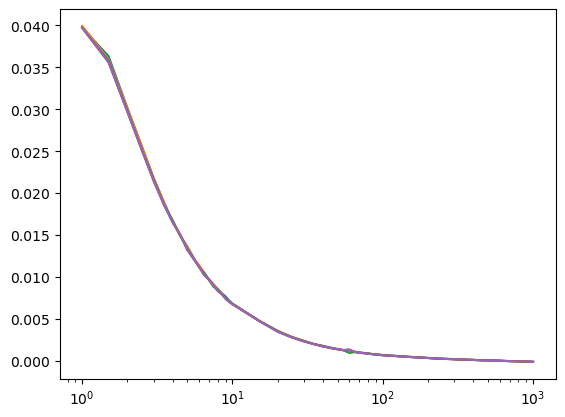

In [135]:
#----------

bg_1 = [5930, 5931, 5932]
#bg_2 = [5933, 5933, 5935]
bg_3 = [5936, 5937, 5938]
bg_4 = [5939, 5940, 5941]
bg_5 = [5942, 5943, 5944]
#bgVec = [bg_1, bg_3, bg_4, bg_5]
bgVec = [bg_5]

sr1_1 = [5945, 5946, 5947]
sr1_2 = [5948, 5949, 5950]
sr1_3 = [5951, 5952, 5953]
sr1Vec = [sr1_1, sr1_2, sr1_3]

sr2_1 = [5954, 5955, 5956]
sr2Vec = [sr2_1]

srFullVec = [sr1_1, sr1_2, sr1_3, sr2_1]

#----------

G = 1e5
V = 4e-3

freqGlobal = []

bgAvg = np.zeros(55)

bgUse = srFullVec
for bg in bgUse:
    freq, realSig, imagSig, magSig = sweepSig_nstFSv01(bg)
    plt.plot(freq, imagSig)
    
    freqGlobal = freq
    bgAvg = np.add(bgAvg, imagSig)
    
bgAvg = np.divide(bgAvg, len(bgUse))

srAvg = np.zeros(55)

srUse = sr2Vec
for sr in srUse:
    freq, realSig, imagSig, magSig = sweepSig_nstFSv01(sr)
    plt.plot(freq, imagSig)
    
    freqGlobal = freq
    srAvg = np.add(srAvg, imagSig)
    
plt.xscale("log")
plt.show()
srAvg = np.divide(srAvg, len(srUse))

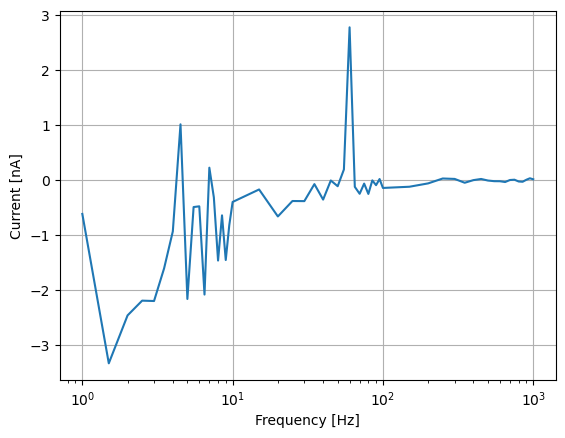

In [137]:
#plt.plot(freq, imagAvg, label = "Imaginary")
#plt.plot(freq, imagSig, label = "Imaginary")

imagElecSig = np.subtract(srAvg, bgAvg)
imagElecCurr = np.multiply(imagElecSig, 1/G)
imagElecCurrnNA = np.multiply(imagElecCurr, 1e9)

imagElecAdmit = np.multiply(imagElecSig, 1/(V*G))
imagElecAdmitNS = np.multiply(imagElecAdmit, 1e9)

plt.plot(freq, imagElecCurrnNA)

plt.grid()
plt.xlabel("Frequency [Hz]")
plt.ylabel(r"Current [nA]")
#plt.title("BG Subtracted and Normalized")
#plt.legend()

plt.xscale("log")

#bestSaveFig("curr-v-freq_11apr2025.png")
plt.show()